# Networkx

* Пакет для Python для манипулирования графиками и их анализа
* Содержит множество стандатных алгоритмов для графов

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Создание графов

Networkx поддерживает неориентированные/ориентированные графы/мультиграфы (мультиграфы позволяют одной паре узлов иметь несколько ребер):
*  Неориентированный граф: `nx.Graph`
*  Ориентированный граф: `nx.DiGraph`
*  Неориентированный мультиграф: `nx.MultiGraph`
*  Ориентированный мультиграф: `nx.MultiDiGraph`

In [3]:
G = nx.Graph()

Networkx имеет отличный набор методов для отображения графов. Напишем функцию, которую будем использовать на вывода графов на экран

In [4]:
def plot_graph(G, node_weights=None, figsize=(6, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    options = dict(
        ax=ax,
        font_size=12,
        node_size=500,
        edgecolors="black",
    )
    
    if node_weights is not None:
        # Normalize weights to [0; 1] for colormap
        weights = np.array([node_weights.get(node, 0) for node in G.nodes()])
        norm = plt.Normalize(vmin=weights.min(), vmax=weights.max())
        cmap = plt.cm.viridis
        minval = 0.2
        maxval = 1.0
        n = 100
        truncated_cmap = colors.LinearSegmentedColormap.from_list(
            "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
            cmap(np.linspace(minval, maxval, n))
        )
        options["node_color"] = [truncated_cmap(norm(w)) for w in weights]
    else:
        options["node_color"] = "white"
    
    
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, **options)
    if nx.is_weighted(G):
        labels = {e: G.edges[e]["weight"] for e in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        
    if node_weights is not None:
        sm = plt.cm.ScalarMappable(cmap=truncated_cmap, norm=norm)
        sm.set_array([])
        plt.colorbar(sm)

Классы графов имеют интерфейс для явного добавления ребер и узлов. Следующие команды, например, строят граф ниже

![graph 1](graph_1.png)

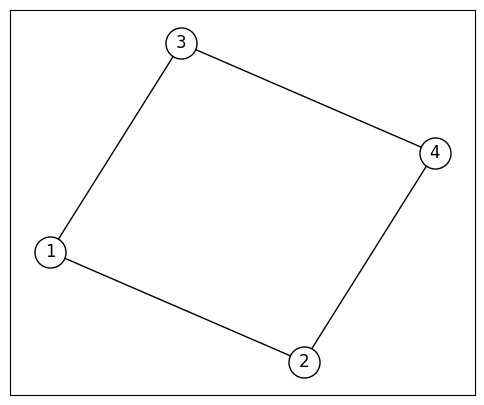

In [5]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)
plot_graph(G)

Направленный граф создается с помощью класса `nx.DiGraph`:

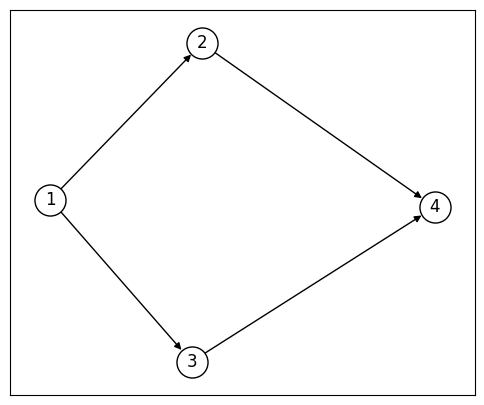

In [6]:
G = nx.DiGraph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)
plot_graph(G)

Мы также можем создать граф напрямую из списка ребер:

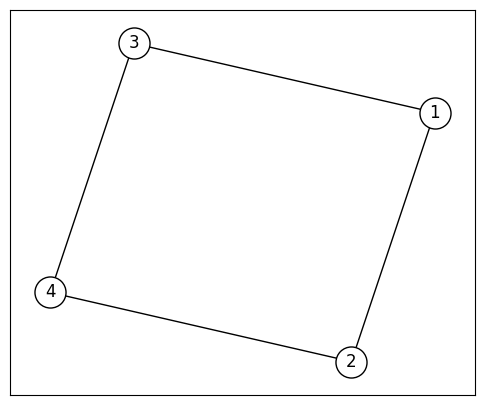

In [7]:
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 4), (3, 4)]
G.add_edges_from(edges)
plot_graph(G)

Опционально мы всегда можем сделать граф взвешенным. Для этого в метод `add_edge()` передается ключевое слово `weight`. Тоже можно сделать и используя метод `add_weighted_edges_from()`:

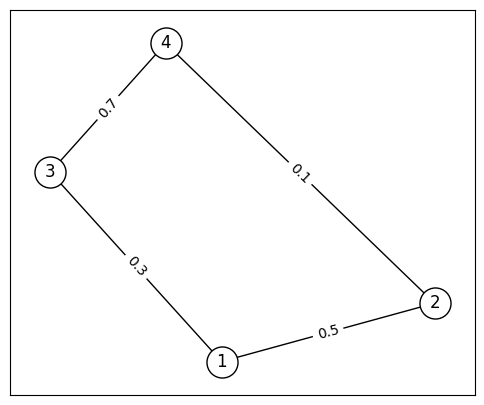

In [8]:
G = nx.Graph()
edges = [(1, 2, 0.5), (1, 3, 0.3), (2, 4, 0.1), (3, 4, 0.7)]
G.add_weighted_edges_from(edges)
plot_graph(G)

Названия узлов могут быть произвольными hashable. Мы также может добавлять произвольные аттрибуты в узлам и ребрам:

In [9]:
def create_city_graph(directed=False):
    G = nx.DiGraph() if directed else nx.Graph()
    G.add_nodes_from([
        ("Moscow", dict(population=13.1)),
        ("Saint Petersburg", dict(population=5.6)),
        ("Kazan", dict(population=1.3)),
        ("Novosibirsk", dict(population=1.6)),
    ])
    G.add_edge("Moscow", "Saint Petersburg", distance=712)
    G.add_edge("Moscow", "Kazan", distance=816)
    G.add_edge("Moscow", "Novosibirsk", distance=3356)
    return G

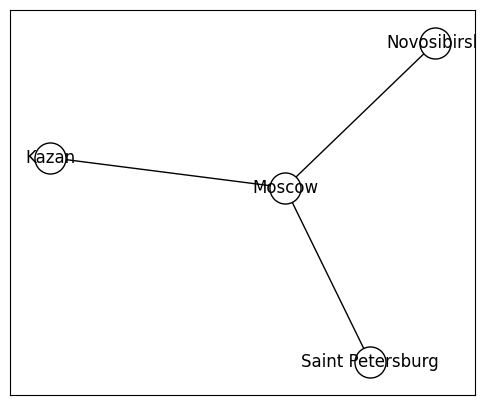

In [10]:
G = create_city_graph(directed=False)
plot_graph(G)

## Доступ к узлам и ребрам

Networkx предоставляет удобный интерфейс для доступа к узлам/ребрам и их аттрибутам, а также позволяет легко итерироваться по ним. Рассмотрим несколько популярных операций

Количество узлов в графе:

In [11]:
len(G)


4

Количество ребер в графе:

In [12]:
len(G.edges)

3

Проверка, присутствует ли узел в графе:

In [13]:
"Moscow" in G

True

In [14]:
G.has_node("Moscow")

True

Проверка, присутствует ли ребро в графе:

In [15]:
("Moscow", "Saint Petersburg") in G.edges

True

In [16]:
G.has_edge("Moscow", "Saint Petersburg")

True

Итерация по узлам:

In [17]:
for n in G:
    if n != "Moscow":
        print(n)

Saint Petersburg
Kazan
Novosibirsk


Итерация по ребрам:

In [18]:
for n_in, n_out in G.edges:
    print(f"{n_in} -- {n_out}")

Moscow -- Saint Petersburg
Moscow -- Kazan
Moscow -- Novosibirsk


Итерацией по ребрам вместе с аттрибутами:

In [19]:
for n_in, n_out, dist in G.edges.data("distance"):
    print(f"{n_in} -- {n_out} ({dist} km)")

Moscow -- Saint Petersburg (712 km)
Moscow -- Kazan (816 km)
Moscow -- Novosibirsk (3356 km)


## Доступ к соседям

Для начала рассмотрим случай ненаправленного графа.

Множество соседей данного узла можно получить, используя `G.neighbors(n)` или `G.adj[n]`. Например, итерация по соседям узла может выглядеть так:

In [20]:
for n in G.neighbors("Moscow"):
    print(n)

Saint Petersburg
Kazan
Novosibirsk


Или так:

In [21]:
for n in G.adj["Moscow"]:
    print(n)

Saint Petersburg
Kazan
Novosibirsk


В направленных графах при рассмотрении соседей данного узла, то есть смежных узлов, нам важно разделять in-edges и out-edges. Для получения доступа к in-edges используется метод `G.predecessors()`, а для out-edges метод `G.successors()`.

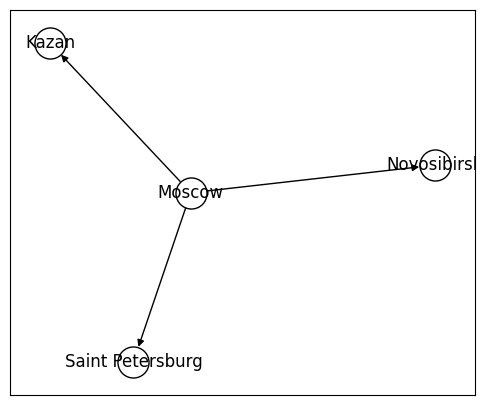

In [22]:
G = create_city_graph(directed=True)
plot_graph(G)

In [23]:
for n in G.successors("Moscow"):
    print(n)

Saint Petersburg
Kazan
Novosibirsk


In [24]:
for n in G.predecessors("Saint Petersburg"):
    print(n)

Moscow


Для нахождения степени вершины используется метод `G.degree(n)`, который реализован и для ненаправленных и для направленных графов. Для направленных графов существуют также отдельные методы для полустепеней захода и исхода (indegree и outdegree), `G.in_degree(n)` и `G.out_degree(n)` соответственно.

In [25]:
G.degree("Saint Petersburg")

1

In [36]:
G.degree()

DegreeView({1: 2, 2: 2, 3: 2, 4: 2})

In [26]:
G.in_degree("Moscow")

0

In [27]:
G.out_degree("Moscow")

3

### Упражнение 1

Напишите функцию, вычисляющую среднюю степень соседей для каждого из узлов, у которых в принципе есть соседи

In [28]:
def avg_neigh_degree(g: nx.Graph) -> dict[int, float]:
    data = {}
    for n in g.nodes():
        if g.degree(n):
            data[n] = np.mean([g.degree(i) for i in g[n]])
    return data

{0: np.float64(2.0), 1: np.float64(3.0), 2: np.float64(2.0), 5: np.float64(3.0), 6: np.float64(3.0), 7: np.float64(2.6666666666666665), 8: np.float64(2.6666666666666665), 9: np.float64(3.0)}


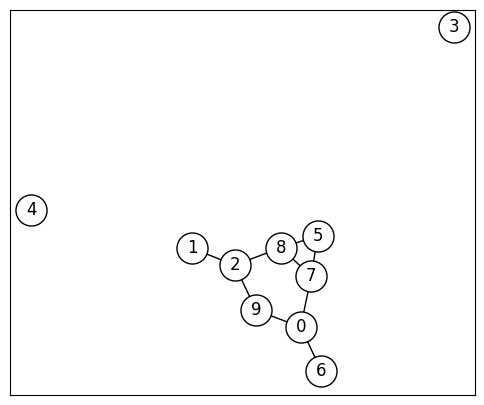

In [29]:
G = nx.erdos_renyi_graph(n=10, p=0.2, directed=False)
print(avg_neigh_degree(G))
plot_graph(G)

## Загрузка и сохранение графов

Наконец, мы можем сохранять графы в файлы и вычитывать их из них. Для простых задач мы можем использовать `adjlist` и `edgelist` форматы:
* `adjlist` является компактным представлением матрицы смежности. Он не подходит для графов с аттрибутами
* `edgelist` является списком ребер с их аттрибутами
* Для обоих методов названия узлов не должны включать пробелов

In [30]:
G = nx.Graph()
edges = [(1, 2, 0.5), (1, 3, 0.3), (2, 4, 0.1), (3, 4, 0.7)]
G.add_weighted_edges_from(edges)
nx.write_adjlist(G, "test_graph.adjlist")

In [31]:
nx.write_edgelist(G, "test_graph.edgelist")

Методы `nx.read_adjlist()` и `nx.read_edgelist()` используются для чтения графов из файлов соответствующих форматов:

In [32]:
G_1 = nx.read_adjlist("test_graph.adjlist")
G_2 = nx.read_edgelist("test_graph.edgelist")

### Упражнение 2

Для n = 10, 20 и 30 найдите соответствующие значения p, при которых почти наверняка пройзодет невзвешенная перколяция в графе Эрдеша-Реньи G(n, p).

In [33]:
def estimate_connectivity_probability(n, p, n_trials):
    is_connected = np.zeros((n_trials,), dtype=np.int_)
    for i in range(n_trials):
        G = nx.erdos_renyi_graph(n=n, p=p)
        is_connected[i] = nx.is_connected(G)
    return np.mean(is_connected)

def plot_percolation_curve(n):
    p = np.linspace(0, 1, 20)
    connectivity_probabilities = np.zeros_like(p, dtype=np.float64)
    n_trials = 1000
    for i in range(len(p)):
        connectivity_probabilities[i] = estimate_connectivity_probability(n=n, p=p[i], n_trials=n_trials)
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(p, connectivity_probabilities, "o--")
    ax.set_xlabel(r"p", fontsize=12)
    ax.set_ylabel(r"perc_prob", fontsize=12)

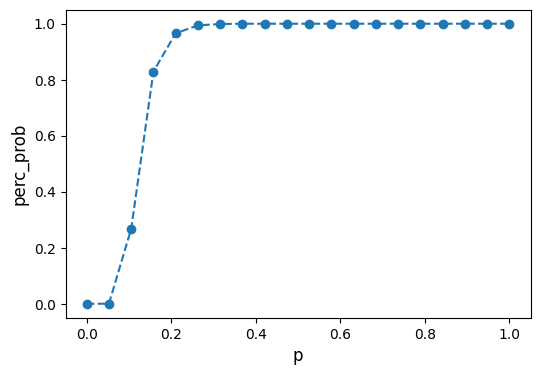

In [34]:
plot_percolation_curve(n=30)